In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

path=Path('C:/Users/Mikhail/Desktop/jupyter fast ai/planet-understanding-the-amazon-from-space')

df = pd.read_csv(path/'train_v2.csv')
#df.head()


tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)


np.random.seed(42)
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.1)
       .label_from_df(label_delim=' '))



data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))



#data.show_batch(rows=3, figsize=(12,9))



epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


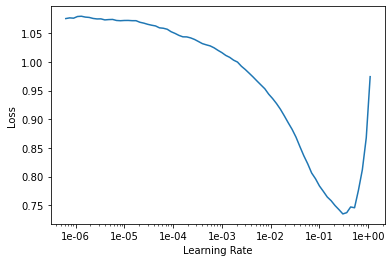

In [2]:

acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, models.resnet101, metrics=[acc_02, f_score])

learn.lr_find()

learn.recorder.plot()

In [3]:
lr = 0.02
learn.fit_one_cycle(4, slice(lr))




epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.123118,0.106452,0.947296,0.908388,02:59
1,0.111081,0.093912,0.953110,0.921557,02:53
2,0.098430,0.086940,0.955028,0.925913,02:53
3,0.090825,0.082884,0.958589,0.928798,02:54


In [4]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


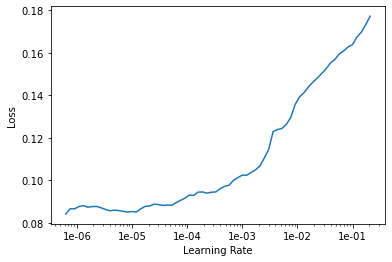

In [5]:
learn.lr_find()
learn.recorder.plot()

In [6]:
learn.fit_one_cycle(2, 1e-4)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.097686,0.087283,0.957078,0.925835,03:37
1,0.087936,0.081799,0.959563,0.930281,03:39


In [7]:
learn.save('stage-2-rn101')

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


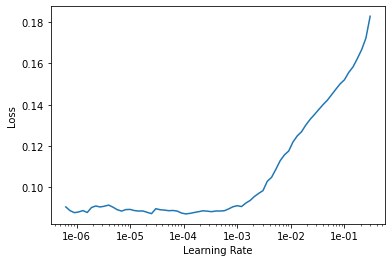

In [8]:
learn.lr_find()
learn.recorder.plot()

In [8]:
data = (src.transform(tfms, size=256)
        .databunch(bs=32).normalize(imagenet_stats))

In [9]:
learn.data = data

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


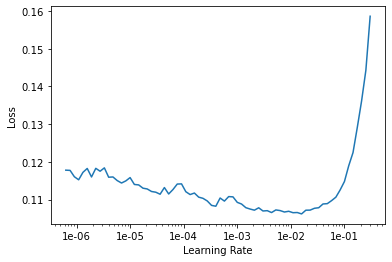

In [10]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(1, slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.094395,0.085161,0.959476,0.929523,07:12


In [12]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


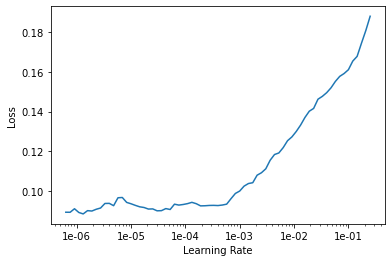

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(2, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.090299,0.081943,0.959491,0.929884,09:15
1,0.087287,0.081303,0.961220,0.931182,09:16


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


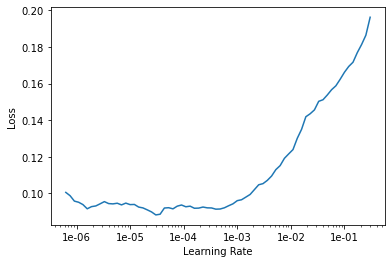

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.save('stage-2-rn101')

In [17]:
test = ImageList.from_folder(path/'test-jpg').add(ImageList.from_folder(path/'test-jpg-additional'))
len(test)

61191

In [18]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [19]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [20]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [21]:
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])

In [22]:
df.to_csv(path/'submission_02.csv', index=False)

In [23]:
df.head()

,image_name,tags
0,test_0,clear primary
1,test_1,clear primary
2,test_10,partly_cloudy primary
3,test_100,agriculture clear cultivation primary road water
4,test_1000,agriculture clear primary road water


In [5]:
learn = load_learner(path, test=test)

NameError: name 'test' is not defined

In [1]:
import torch
torch.cuda.empty_cache()